In [39]:
using SymPy
using PyPlot
using JuAFEM

In [40]:
x,y,z = Sym("x"), Sym("y"), Sym("z");
E, ν = Sym("E"), Sym("nu")
ux, uy = Sym("u_x"), Sym("u_y")

(u_x,u_y)

In [41]:
f = simplify(E / ((1+ν) * (1-2ν)));
G = simplify(E / (2(1 + ν)))
λ = simplify(f * ν);
M = simplify(f * (1 - ν));

In [42]:
D = [M    λ     0;
     λ    M     0;
     0    0     G;]

3x3 Array{SymPy.Sym,2}
[     E*(nu - 1)             -E*nu                   ]
[-------------------  -------------------      0     ]
[(nu + 1)*(2*nu - 1)  (nu + 1)*(2*nu - 1)            ]
[                                                    ]
[       -E*nu              E*(nu - 1)                ]
[-------------------  -------------------      0     ]
[(nu + 1)*(2*nu - 1)  (nu + 1)*(2*nu - 1)            ]
[                                                    ]
[                                              E     ]
[         0                    0           ----------]
[                                          2*(nu + 1)]

In [43]:
ϵ = [Derivative(ux, x);
     Derivative(uy, y);
     1/2 * (Derivative(ux, y) + Derivative(uy, x))]

3-element Array{SymPy.Sym,1}
[         d               ]
[         --(u_x)         ]
[         dx              ]
[                         ]
[         d               ]
[         --(u_y)         ]
[         dy              ]
[                         ]
[    d             d      ]
[0.5*--(u_x) + 0.5*--(u_y)]
[    dy            dx     ]

In [44]:
σ = D * ϵ

3-element Array{SymPy.Sym,1}
[           d                        d      ]
[      E*nu*--(u_y)       E*(nu - 1)*--(u_x)]
[           dy                       dx     ]
[- ------------------- + -------------------]
[  (nu + 1)*(2*nu - 1)   (nu + 1)*(2*nu - 1)]
[                                           ]
[           d                        d      ]
[      E*nu*--(u_x)       E*(nu - 1)*--(u_y)]
[           dx                       dy     ]
[- ------------------- + -------------------]
[  (nu + 1)*(2*nu - 1)   (nu + 1)*(2*nu - 1)]
[                                           ]
[         /    d             d      \       ]
[       E*|0.5*--(u_x) + 0.5*--(u_y)|       ]
[         \    dy            dx     /       ]
[       -----------------------------       ]
[                 2*(nu + 1)                ]

$\mathbf{f}_i = \mathbf{\sigma}_{ij,j}$

In [45]:
f =  -[Derivative(σ[1], x) + Derivative(σ[3], y);
       Derivative(σ[3], x) + Derivative(σ[2], y)]

2-element Array{SymPy.Sym,1}
[    /  /    d             d      \\     /           d                        
[    |E*|0.5*--(u_x) + 0.5*--(u_y)||     |      E*nu*--(u_y)       E*(nu - 1)*
[  d |  \    dy            dx     /|   d |           dy                       
[- --|-----------------------------| - --|- ------------------- + ------------
[  dy\          2*(nu + 1)         /   dx\  (nu + 1)*(2*nu - 1)   (nu + 1)*(2*
[                                                                             
[    /  /    d             d      \\     /           d                        
[    |E*|0.5*--(u_x) + 0.5*--(u_y)||     |      E*nu*--(u_x)       E*(nu - 1)*
[  d |  \    dy            dx     /|   d |           dx                       
[- --|-----------------------------| - --|- ------------------- + ------------
[  dx\          2*(nu + 1)         /   dy\  (nu + 1)*(2*nu - 1)   (nu + 1)*(2*

d      \]
--(u_x)|]
dx     |]
-------|]
nu - 1)/]
        ]
d      \]
--(u_y)|]
dy     |]
-------|]
n

Give weird expressions to field and parameters

In [85]:
E0, u0, ν0, R = Sym("E_0"), Sym("u_0"), Sym("nu_0"), Sym("R");
ux_MMS = (1 + x^2 * y^2) #(1 + sin(x/R)^2*cos(2*y/R)^2)
uy_MMS = (1 + 4 * x^2 * y^2)# (1 + sin(2x/R)^2*sin(4*y/R)^2)
#ux_MMS = (1 + sin(x/R)^2*cos(2*y/R)^2)
#uy_MMS = (1 + sin(2x/R)^2*sin(4*y/R)^2)
E_MMS = E0 #* (1 + sqrt(x^2 + 2y^2) / R)
ν_MMS = ν0 #* (1 + sqrt(3x^2 + 4y^2) / R)
display(Eq(Sym("u_x"), ux_MMS))
display(Eq(Sym("u_y"), uy_MMS))
display(Eq(Sym("E"), E_MMS))
display(Eq(Sym("nu"), ν_MMS))

       2  2    
u_x = x *y  + 1

         2  2    
u_y = 4*x *y  + 1

E = E_0

nu = nu_0

Substitute the force with the expressions

In [86]:
f_MMS = subs(f, (E, E_MMS), (ν, ν_MMS), (ux, ux_MMS), (uy, uy_MMS))

2x1 Array{SymPy.Sym,2}
[    /    /    d / 2  2    \       d /   2  2    \\\     /           d /   2  
[    |E_0*|0.5*--\x *y  + 1/ + 0.5*--\4*x *y  + 1/||     |  E_0*nu_0*--\4*x *y
[  d |    \    dy                  dx             /|   d |           dy       
[- --|---------------------------------------------| - --|- ------------------
[  dy\                 2*(nu_0 + 1)                /   dx\  (nu_0 + 1)*(2*nu_0
[                                                                             
[    /    /    d / 2  2    \       d /   2  2    \\\     /            d / 2  2
[    |E_0*|0.5*--\x *y  + 1/ + 0.5*--\4*x *y  + 1/||     |   E_0*nu_0*--\x *y 
[  d |    \    dy                  dx             /|   d |            dx      
[- --|---------------------------------------------| - --|- ------------------
[  dx\                 2*(nu_0 + 1)                /   dy\  (nu_0 + 1)*(2*nu_0

2    \                  d / 2  2    \\ ]
  + 1/   E_0*(nu_0 - 1)*--\x *y  + 1/| ]
                        d

### Perform the derivatives!

In [87]:
f_MMS_done = [doit(f_MMS[1]); doit(f_MMS[2])]

2-element Array{SymPy.Sym,1}
[                                   2                    /     2          \]
[    16*E_0*nu_0*x*y         2*E_0*y *(nu_0 - 1)     E_0*\1.0*x  + 8.0*x*y/]
[----------------------- - ----------------------- - ----------------------]
[(nu_0 + 1)*(2*nu_0 - 1)   (nu_0 + 1)*(2*nu_0 - 1)        2*(nu_0 + 1)     ]
[                                                                          ]
[                                   2                    /               2\]
[     4*E_0*nu_0*x*y         8*E_0*x *(nu_0 - 1)     E_0*\2.0*x*y + 4.0*y /]
[----------------------- - ----------------------- - ----------------------]
[(nu_0 + 1)*(2*nu_0 - 1)   (nu_0 + 1)*(2*nu_0 - 1)        2*(nu_0 + 1)     ]

### Insert the constants

In [88]:
E00 = 10
nu00 = 0.3
RR = 2.0
u00 = 1.0
f_p = [subs(f_MMS_done[1], (E0, E00), (ν0, nu00), (R, RR), (u0, u00)); 
     subs(f_MMS_done[2], (E0, E00), (ν0, nu00), (R, RR), (u0, u00))]
u_xp = subs(ux_MMS, (E0, E00), (ν0, nu00), (R, RR), (u0, u00));
u_yp = subs(uy_MMS, (E0, E00), (ν0, nu00), (R, RR), (u0, u00));

In [89]:
f_p

2-element Array{SymPy.Sym,1}
[                          2                                                  
[- -3.84615384615385*(-1)*x  - -123.076923076923*(-1)*x*y - -26.9230769230769*
[                                                                             
[                          2                                                  
[- -107.692307692308*(-1)*x  - -30.7692307692308*(-1)*x*y - -15.3846153846154*

      2]
(-1)*y ]
       ]
      2]
(-1)*y ]

In [90]:
# Compile the functions so they don't have to go through the symbolic system
using PyCall
@pyimport sympy.utilities.autowrap as aw
f_p_u = [aw.ufuncify([x.x, y.x], f_p[1].x), aw.ufuncify([x.x, y.x], f_p[2].x)]
u_xp_u = aw.ufuncify([x.x, y.x], u_xp.x)
u_yp_u = aw.ufuncify([x.x, y.x], u_yp.x)

fn (generic function with 1 method)

In [91]:
function computee(f_p_u, xx, yy)
    return f_p_u[1](xx, yy), f_p_u[2](xx, yy)
end

computee (generic function with 1 method)

In [92]:
Nx = Ny = 40
p1 = [-1,-1]
p2 = [ 1, 1]
xsp = linspace(p1[1],p2[1],Nx)
ysp = linspace(p1[2],p2[2],Ny)
Z1 = zeros(Nx,Nx)
Z2 = zeros(Ny,Ny)
for (i, xx) in enumerate(xsp), (j, yy) in enumerate(ysp)
    Z = computee(f_p_u, xx, yy)
    Z1[i,j] = Z[1]
    Z2[i,j] = Z[2]
end
mag = sqrt(Z1.^2 + Z2.^2);

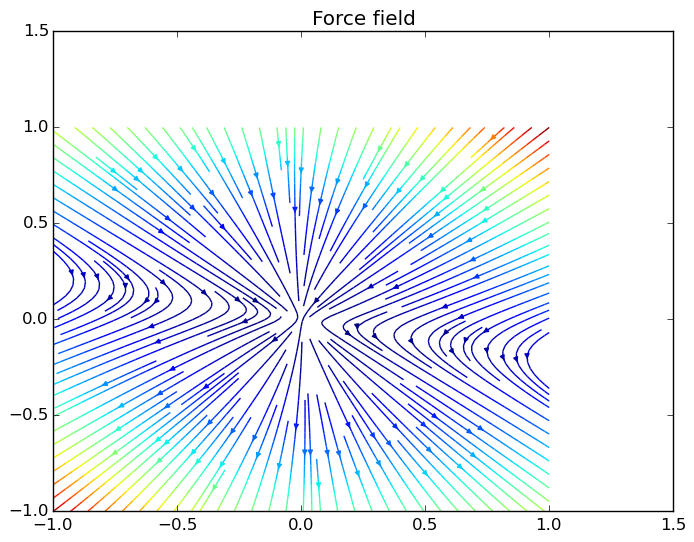

PyObject <matplotlib.text.Text object at 0x7f0c81b81290>

In [93]:
streamplot(collect(xsp), collect(ysp), Z1, Z2, 2, color=mag)
title("Force field")

In [94]:
Edof, Ex, Ey, B1, B2, B3, B4, coords = JuAFEM.gen_quad_mesh(p1, p2, Nx, Ny, 2);

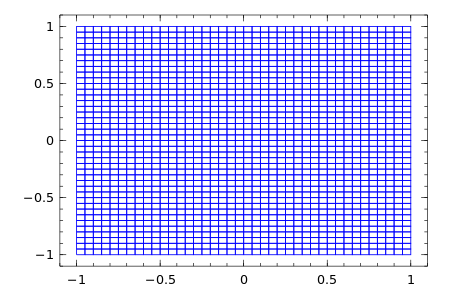

In [95]:
eldraw2(Ex, Ey, [1,2,2])

In [96]:
A = (p2[1] - p1[1]) * (p2[2] - p1[2]) / (Nx * Ny);

In [97]:
a_ana = zeros(length(coords))
for c in 1:size(coords,1)
    #print(size(coords))A = (p2[1] - p1[1]) * (p2[2] - p1[2]) / (Nx * Ny);
    coord_x = coords[c,1]
    coord_y = coords[c,2]
    a_ana[c*2-1] = u_xp_u(coord_x, coord_y)
    a_ana[c*2] = u_yp_u(coord_x, coord_y)
end
Ed_ana = JuAFEM.extract_eldisp(Edof, a_ana);

In [98]:
bc_dofs = union(B1[:], B2[:], B3[:], B4[:])
bc = zeros(length(bc_dofs), 2)
for i in 1:size(bc, 1)
    dof = bc_dofs[i]
    bc[i, 1] = dof
    node = div(dof+1, 2)
    coord_x = coords[node, 1]
    coord_y = coords[node, 2]
    x_dof = mod(dof,2) != 0
    if x_dof
        bc[i, 2] = u_xp_u(coord_x, coord_y)
    else
        bc[i, 2] = u_yp_u(coord_x, coord_y)
    end
end

In [99]:
a = start_assemble()
D = hooke(2, E00, nu00)
f_ext = zeros(length(coords))
for e in 1:size(Edof, 1)
    ex = Ex[Edof[e,1], :]'
    ey = Ey[Edof[e,1], :]'
    
    center = [sum(ex, 1)/4 sum(ey, 1)/4]
    #eq_sym = computee(f_p_u, center[1], center[2])

    Ke, fe = JuAFEM.plani4e(ex, ey, [2, 1, 2], D, f_p_u) #[eq_sym[1], eq_sym[2]])
    f_ext[Edof[e,2:end]] += reshape(fe, (1,8))
    assemble(Edof[e, :], a, Ke)
end
K = end_assemble(a);
K = end_assemble(a);
a_fem, Q = solve_eq_sys(K, f_ext, bc);

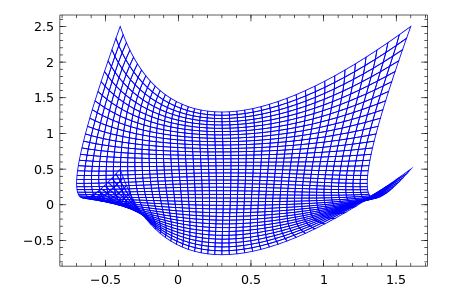

In [100]:
Ed_fem = extract_eldisp(Edof, a_fem);
eldisp2(Ex, Ey, Ed_fem, [1,2,2], 0.3)

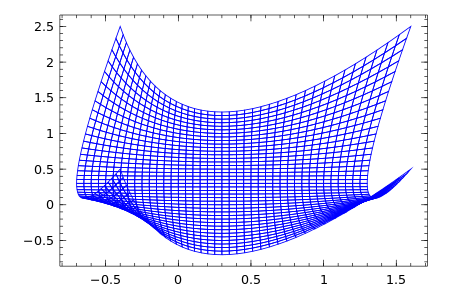

In [101]:
Ed_ana = extract_eldisp(Edof, a_ana);
eldisp2(Ex, Ey, Ed_ana, [1,2,2], 0.3)

In [102]:
free = setdiff(1:length(coords), bc[:,1])
norm(a_fem[free] - a_ana[free]) / norm(a_ana[free])

0.0531568917506127

In [103]:
le = length(free)
XX = reshape(coords[:,1], (Nx + 1, Ny+1));
YY = reshape(coords[:,2], (Nx + 1, Ny+1));
Err_x = reshape(a_fem[1:2:end] - a_ana[1:2:end], (Nx + 1, Ny+1));
Err_y = reshape(a_fem[2:2:end] - a_ana[2:2:end], (Nx + 1, Ny+1));

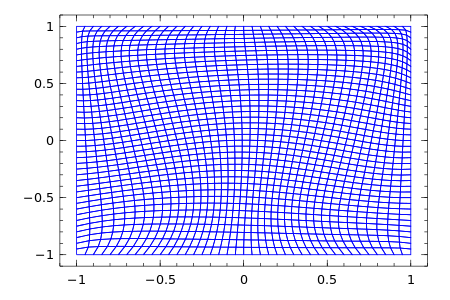

In [104]:
Ediff = extract_eldisp(Edof, a_fem - a_ana);
eldisp2(Ex, Ey, Ediff, [1,2,2])

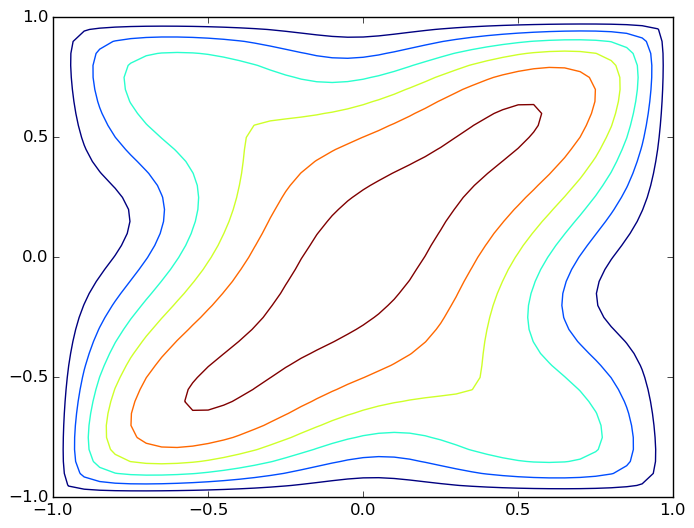

PyObject <matplotlib.contour.QuadContourSet instance at 0x7f0c8374dab8>

In [105]:
contour(XX, YY, sqrt(Err_x.^2 + Err_y.^2))

In [106]:
function run(Nx, Ny)
    Edof, Ex, Ey, B1, B2, B3, B4, coords = JuAFEM.gen_quad_mesh(p1, p2, Nx, Ny, 2);
    a_ana = zeros(length(coords))
    for c in 1:size(coords,1)
        #print(size(coords))
        coord_x = coords[c,1]
        coord_y = coords[c,2]
        a_ana[c*2-1] = u_xp_u(coord_x, coord_y)
        a_ana[c*2] = u_yp_u(coord_x, coord_y)
    end
    Ed_ana = JuAFEM.extract_eldisp(Edof, a_ana);
    bc_dofs = union(B1[:], B2[:], B3[:], B4[:])
    bc = zeros(length(bc_dofs), 2)
    for i in 1:size(bc, 1)
        dof = bc_dofs[i]
        bc[i, 1] = dof
        node = div(dof+1, 2)
        coord_x = coords[node, 1]
        coord_y = coords[node, 2]
        x_dof = mod(dof,2) != 0
        if x_dof
            bc[i, 2] = u_xp_u(coord_x, coord_y)
        else
            bc[i, 2] = u_yp_u(coord_x, coord_y)
        end
    end
    a = start_assemble()
    D = hooke(2, E00, nu00)
    f_ext = zeros(length(coords))
    for e in 1:size(Edof, 1)
        ex = Ex[Edof[e,1], :]'
        ey = Ey[Edof[e,1], :]'

        center = [sum(ex, 1)/4 sum(ey, 1)/4]
        eq_sym = computee(f_p_u, center[1], center[2])

        Ke, fe = JuAFEM.plani4e(ex, ey, [2, 1, 2], D, [eq_sym[1], eq_sym[2]])
        f_ext[Edof[e,2:end]] += reshape(fe, (1,8))
        assemble(Edof[e, :], a, Ke)
    end
    K = end_assemble(a);
    a_fem, Q = solve_eq_sys(K, f_ext, bc);
    Ed = extract(Edof, a_fem)
    eldisp2(Ex, Ey, Ed, [1,1,2])
    free = setdiff(1:length(coords), bc[:,1])
    return norm(a_fem[free] - a_ana[free]) / norm(a_ana[free])
end

run (generic function with 1 method)

In [108]:
Ns = 10:10:90
convs = Float64[]
for N in Ns
    conv = run(N,N)
    println("Current error for Nx=Ny=$N: $conv")
    push!(convs, run(N,N))
end

Current error for Nx=Ny=10: 0.06767402799822451
Current error for Nx=Ny=20: 0.056894740099694315
Current error for Nx=Ny=30: 0.054142901881061994
Current error for Nx=Ny=40: 0.05290474480348823
Current error for Nx=Ny=50: 0.05220352085416935
Current error for Nx=Ny=60: 0.05175285204242197
Current error for Nx=Ny=70: 0.051439009699558856
Current error for Nx=Ny=80: 0.0512079725858492
Current error for Nx=Ny=90: 0.05103082304562836


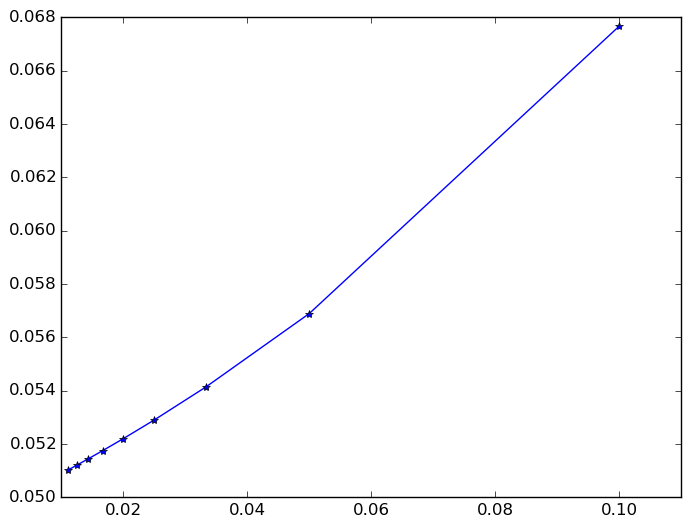

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0c580be2d0>

In [117]:
plot(1./Ns, convs, "*-")

In [78]:
offset = 4
Δx = log10(1./Ns[end-offset]) - log10(1./Ns[end])
Δy = log10(conv[end-offset]) - log10(conv[end])
Δy / Δx

0.038653681133479056